In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Display basic information
print(data.head())
print("\nData shape:", data.shape)
print("\nData info:")
data.info()
print("\nMissing values:\n", data.isnull().sum())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [5]:
y_pred = dt_classifier.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[10595   373]
 [  661   728]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357


Accuracy Score: 0.9163227320547058


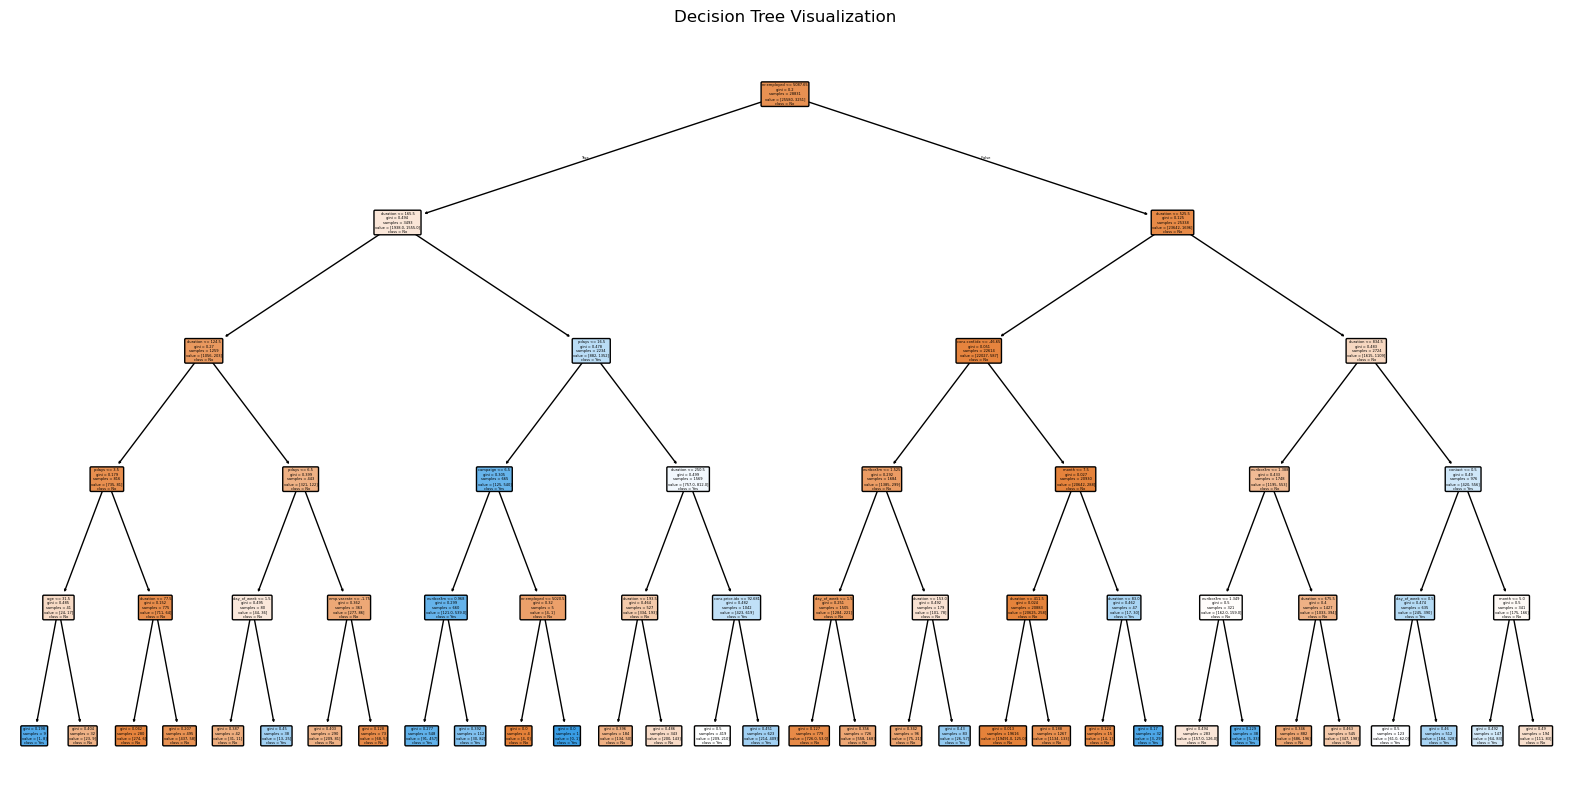

In [6]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

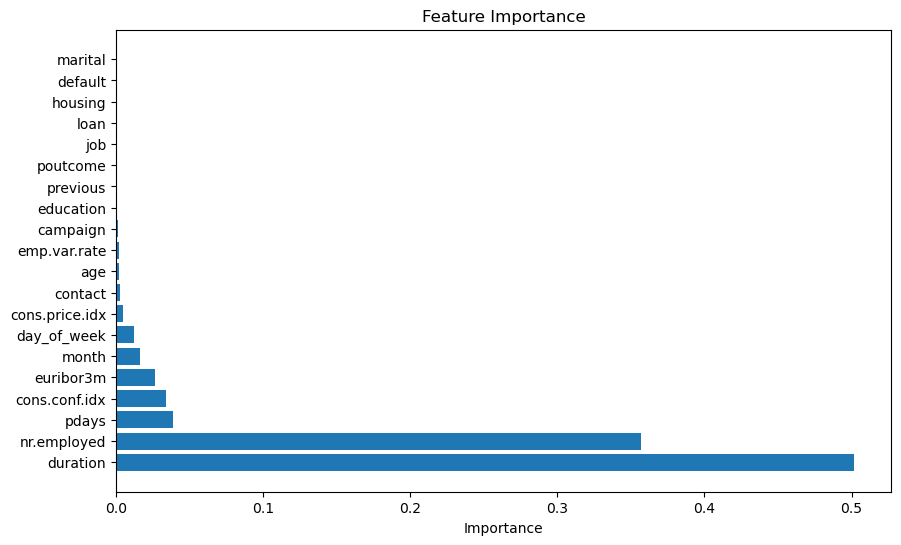

In [7]:
importances = dt_classifier.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

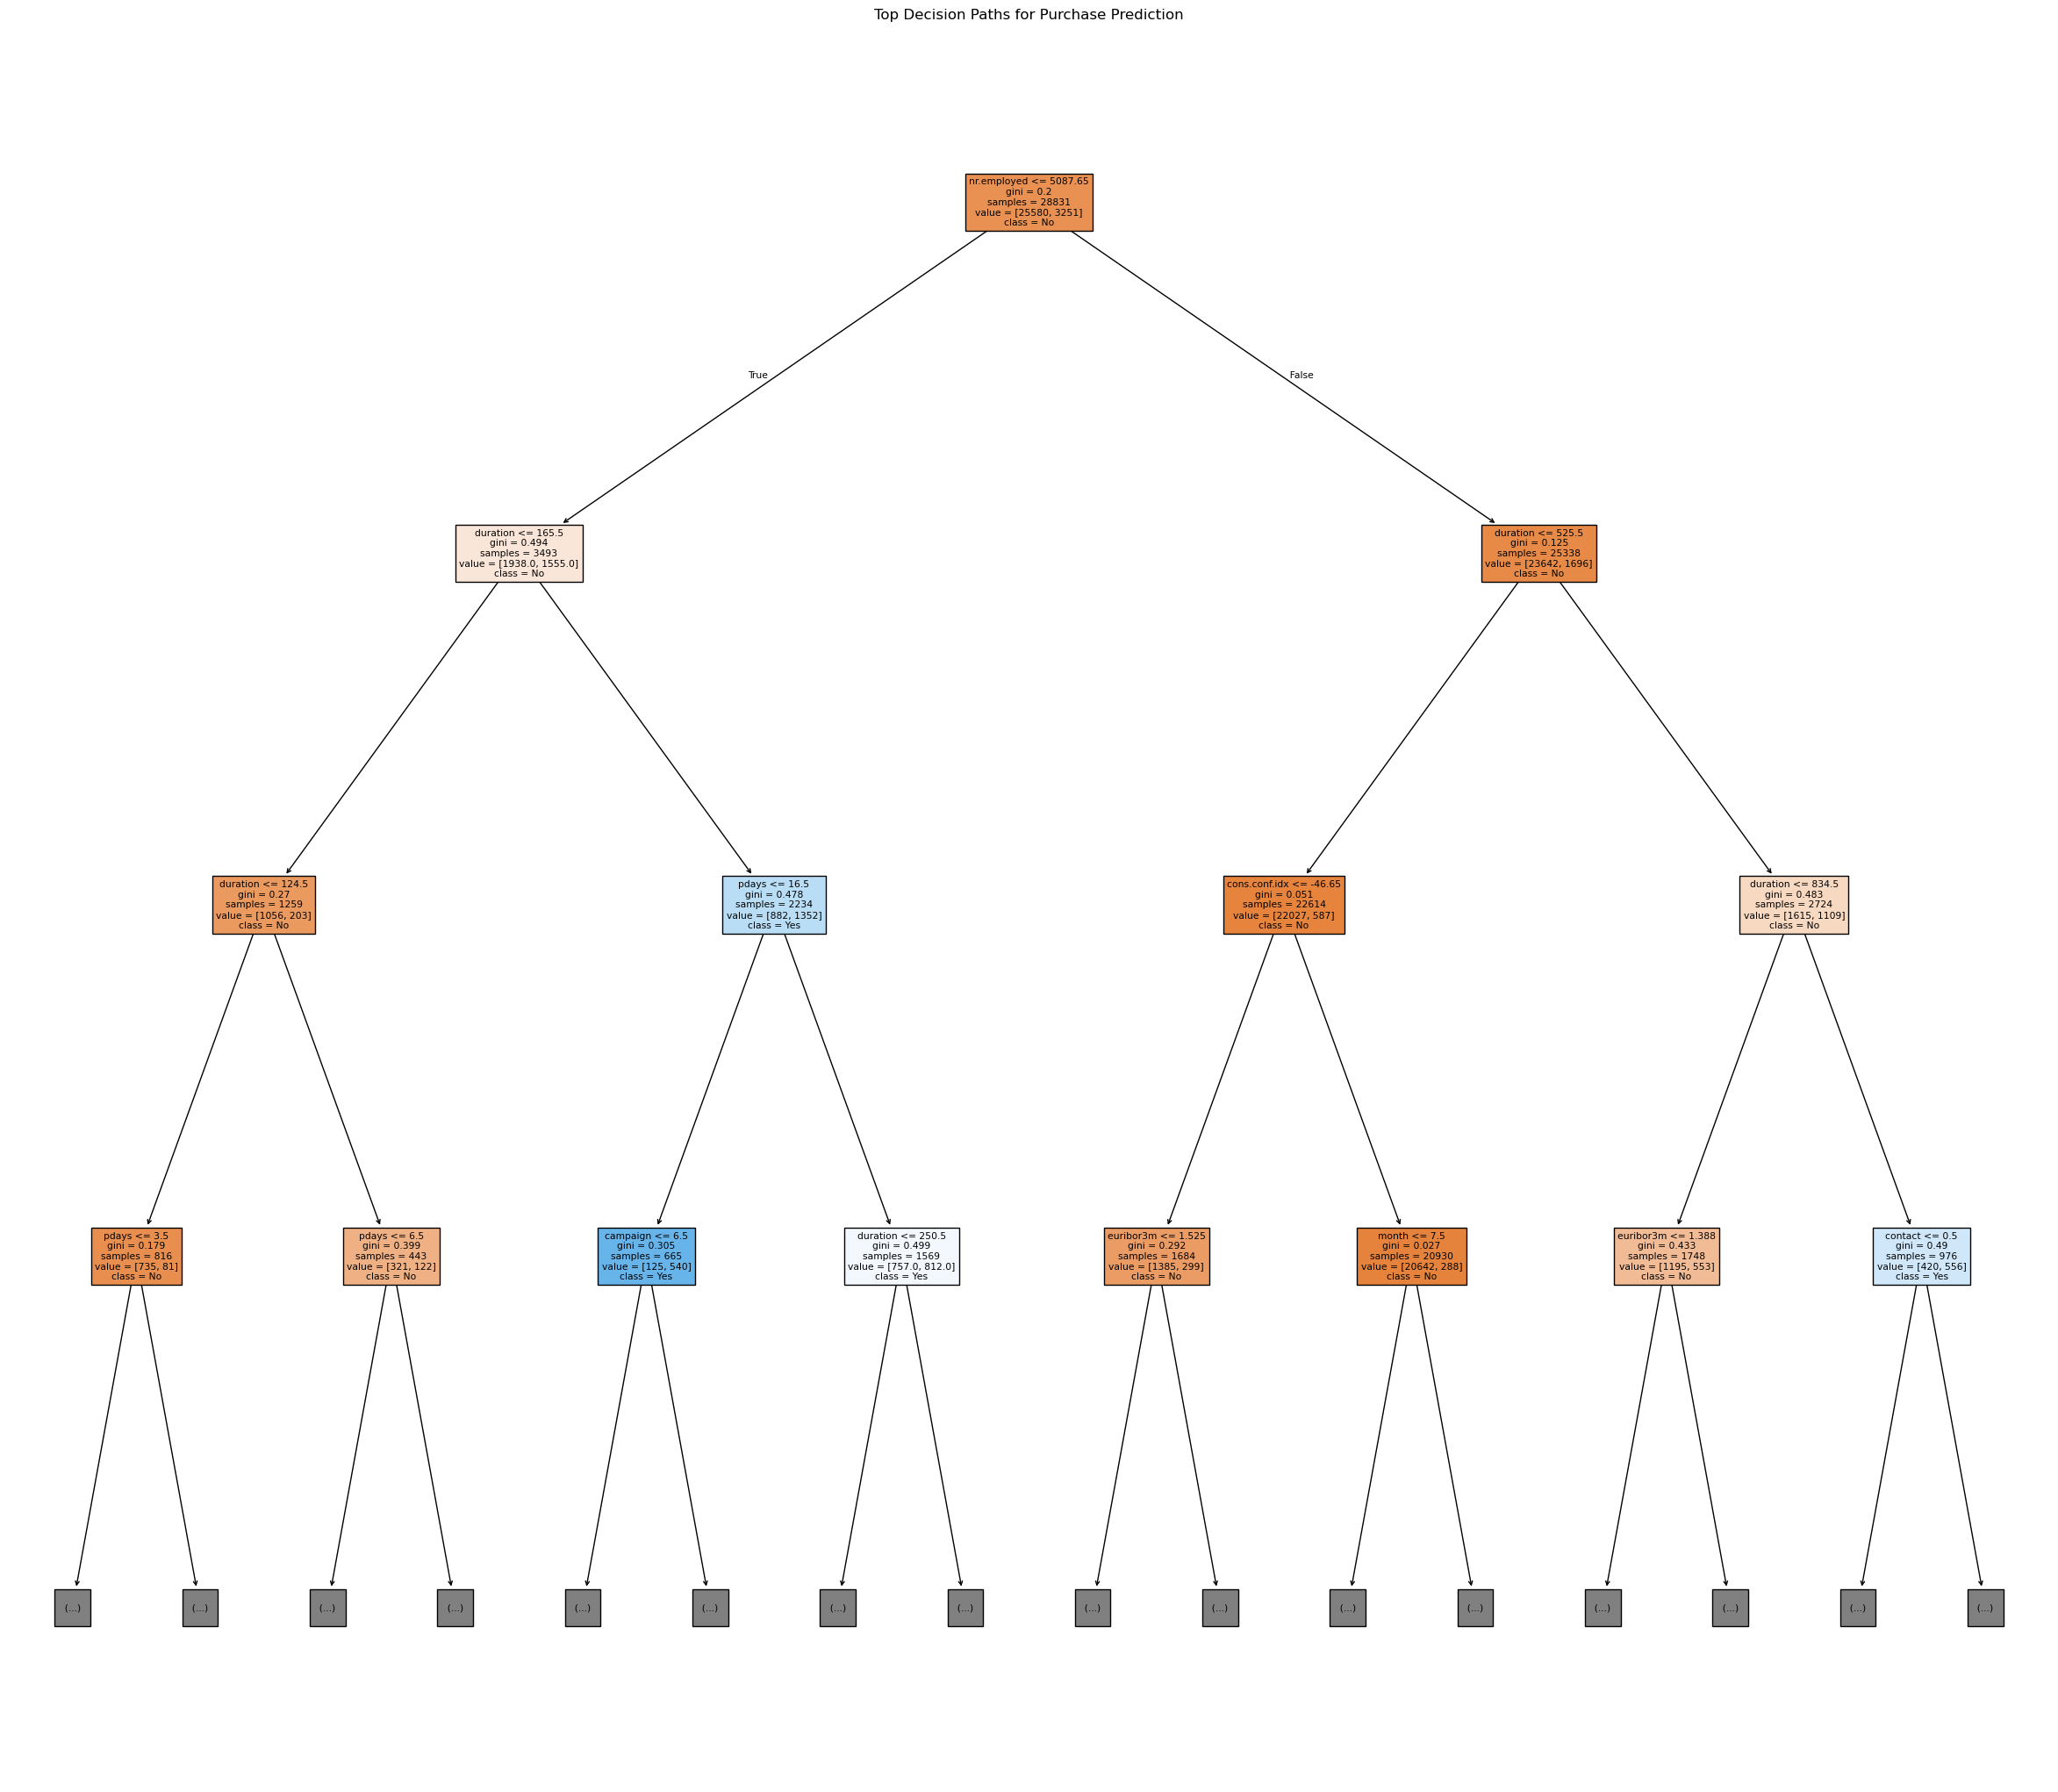

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 26))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title('Top Decision Paths for Purchase Prediction')
plt.show()

C:\Users\KRISHNAJI S\AppData\Local\Temp\ipykernel_22824\721116776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette=['#FF9999', '#66B2FF'])


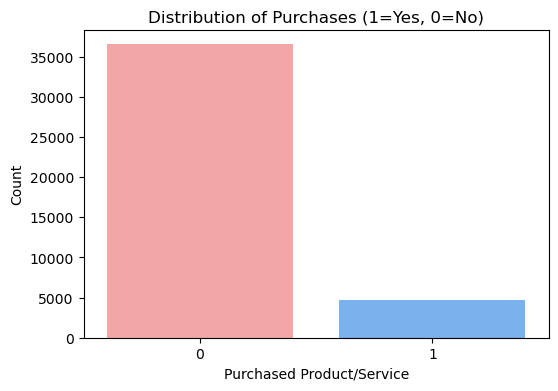

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data, palette=['#FF9999', '#66B2FF'])
plt.title('Distribution of Purchases (1=Yes, 0=No)')
plt.xlabel('Purchased Product/Service')
plt.ylabel('Count')
plt.show()